<a href="https://colab.research.google.com/github/devrajPriyadarshi/EC61211-Term-Paper-Code/blob/main/PatternRecognition_Term_Paper_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tf
import torch.optim as optim

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from torchsummary import summary

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)

In [6]:
# for i in range(len(X)):
#   print("data:", X[i], " value:", y[i] )

In [7]:
pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [8]:
# for i in range(len(X)):
#   print("data:", principalComponents[i], " value:", y[i])

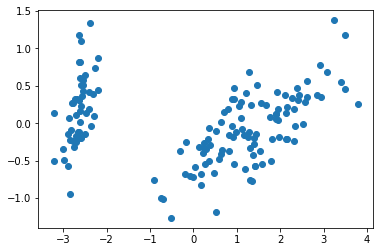

In [58]:
plt.figure()
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.show()

In [66]:
class PCA_NN(nn.Module):
  def __init__(self):
    
    super().__init__()
    self.lin1 = nn.Linear(4, 2)
    self.lin2 = nn.Linear(2, 4)
    self.double()

  def forward_half1(self, x):

    x = self.lin1(x.double())

    return x

  def forward_half2(self, x):

    x = self.lin2(x.double())

    return x

  def forward(self, x, path="all"):
    if path == "all":
      x = self.forward_half1(x)
      x = self.forward_half2(x)

      return x

    elif path == "pca":
      x = self.forward_half1(x)

      return x

pca = PCA_NN().to(device)
summary(pca, (1, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 2]              10
            Linear-2                 [-1, 1, 4]              12
Total params: 22
Trainable params: 22
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [60]:
class TrainDataset(Dataset):
    def __init__(self, sourceTransform):
        self.sourceTransform = sourceTransform
        return

    def __len__(self):
        return len(X)

    def __getitem__(self, idx):        
        input = np.array(X[idx])        
        label = np.array(X[idx])
        if self.sourceTransform:
            input = self.sourceTransform(input)

        return input.astype(float), label.astype(float)

# class TestDataset(Dataset):
#     def __init__(self, sourceTransform):
#         self.sourceTransform = sourceTransform
#         return

#     def __len__(self):
#         return len(testData)

#     def __getitem__(self, idx):        
#         input = np.array(testData.iloc[idx][0:4],dtype = "float")
#         input = torch.from_numpy(input)
        
#         label = np.argmax(np.array(trainData.iloc[idx][5:16],dtype = "float"))

#         if self.sourceTransform:
#             input = self.sourceTransform(input)

#         return input, label


In [61]:
transform = tf.Compose([])
batch_size = 32

trainset = TrainDataset( sourceTransform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# testset = TestDataset( sourceTransform=transform)
# testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [62]:
pca = PCA_NN().to(device)
# pca_output = PCA_NN_output(pca).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(pca.parameters(), lr=0.001, momentum = 0.9)

epochs = 200
for epoch in range(epochs): 

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = pca(inputs.float())
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    
  print(f'[{epoch + 1}] loss: {running_loss}')
  running_loss = 0.0

print('Finished Training')

[1] loss: 64.7984440774642
[2] loss: 58.068763887057344
[3] loss: 48.84221040112192
[4] loss: 34.200201105361586
[5] loss: 16.289163461767117
[6] loss: 6.477102810108494
[7] loss: 4.0433454509461395
[8] loss: 3.589823728483944
[9] loss: 4.046212055154742
[10] loss: 3.4532164313585016
[11] loss: 3.004620848165729
[12] loss: 2.5280326818017373
[13] loss: 2.4157011509946376
[14] loss: 2.2912295149858433
[15] loss: 2.1872955217288226
[16] loss: 2.180944626002015
[17] loss: 2.1284040833309366
[18] loss: 2.0259769482111976
[19] loss: 1.9287567480734675
[20] loss: 1.875052455466431
[21] loss: 1.8263441462241108
[22] loss: 1.7936536111600483
[23] loss: 1.7353646943366923
[24] loss: 1.7007456341350278
[25] loss: 1.6126527195640958
[26] loss: 1.5576793747898747
[27] loss: 1.4647734132313044
[28] loss: 1.4102414190031394
[29] loss: 1.355408694418322
[30] loss: 1.2947270010206424
[31] loss: 1.2361995762348204
[32] loss: 1.1994156384862493
[33] loss: 1.1305013180142929
[34] loss: 1.049579943420809


In [63]:
# pca = PCA_NN().to(device)

In [64]:
result = np.copy(principalComponents)
for i in range(len(X)):
  r = pca(torch.from_numpy(X[i]).double(), path="pca")
  result[i][0] = r[0].item()
  result[i][1] = r[1].item()


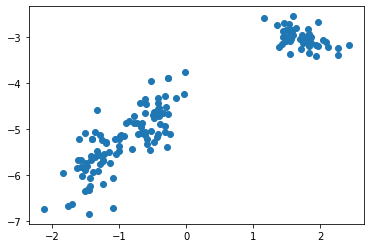

In [65]:
plt.figure()
plt.scatter(result[:,0], result[:,1])
plt.show()

In [68]:
class NLCA_NN(nn.Module):
  def __init__(self):
    
    super().__init__()
    self.lin1 = nn.Linear(4, 3)
    self.lin2 = nn.Linear(3, 2)
    self.lin3 = nn.Linear(2, 3)
    self.lin4 = nn.Linear(3, 4)

    self.Activation1 = nn.Sigmoid()
    self.Activation2 = nn.Sigmoid()

    self.double()

  def forward_half1(self, x):

    x = self.Activation1(self.lin1(x.double()))
    x = self.lin2(x.double())

    return x

  def forward_half2(self, x):

    x = self.Activation2(self.lin3(x.double()))
    x = self.lin4(x.double())

    return x

  def forward(self, x, path="all"):
    if path == "all":
      x = self.forward_half1(x)
      x = self.forward_half2(x)

      return x

    elif path == "nlca":
      x = self.forward_half1(x)

      return x

nlca = NLCA_NN().to(device)
summary(nlca, (1, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 3]              15
           Sigmoid-2                 [-1, 1, 3]               0
            Linear-3                 [-1, 1, 2]               8
            Linear-4                 [-1, 1, 3]               9
           Sigmoid-5                 [-1, 1, 3]               0
            Linear-6                 [-1, 1, 4]              16
Total params: 48
Trainable params: 48
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [69]:
nlca = NLCA_NN().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(nlca.parameters(), lr=0.001, momentum = 0.9)

epochs = 200
for epoch in range(epochs): 

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = nlca(inputs.float())
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    
  print(f'[{epoch + 1}] loss: {running_loss}')
  running_loss = 0.0

print('Finished Training')

[1] loss: 80.97105146249088
[2] loss: 78.76888593341043
[3] loss: 74.33811761466549
[4] loss: 69.87538623421801
[5] loss: 64.65623591718594
[6] loss: 60.137508363324784
[7] loss: 54.92963597026519
[8] loss: 50.78761686669516
[9] loss: 47.09876942775861
[10] loss: 43.227453831174586
[11] loss: 39.468068183780744
[12] loss: 36.800431962141644
[13] loss: 33.34773390691381
[14] loss: 30.81659102818887
[15] loss: 28.22510232297948
[16] loss: 25.943020136557834
[17] loss: 23.821226879393578
[18] loss: 21.892424888352835
[19] loss: 19.976221474885868
[20] loss: 18.57908861690934
[21] loss: 17.07760011211328
[22] loss: 15.892656355435948
[23] loss: 14.601627134612835
[24] loss: 13.398014798378373
[25] loss: 12.672191325248297
[26] loss: 11.947136073025577
[27] loss: 11.01563148515593
[28] loss: 10.496219652859033
[29] loss: 9.980800991776494
[30] loss: 9.324704048005525
[31] loss: 8.875720080206047
[32] loss: 8.555121466905398
[33] loss: 8.093661740853502
[34] loss: 7.773541819418666
[35] loss

In [70]:
result = np.copy(principalComponents)
for i in range(len(X)):
  r = nlca(torch.from_numpy(X[i]).double(), path="nlca")
  result[i][0] = r[0].item()
  result[i][1] = r[1].item()


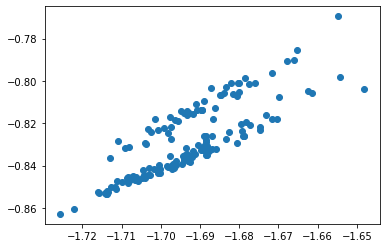

In [71]:
plt.figure()
plt.scatter(result[:,0], result[:,1])
plt.show()